In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Array basics
## Construction/Accessing

In [13]:
# Array sequences
array_sequence = np.array([1, 0, 0])
array_multi = np.array([[1, 0],[0, 1]])
array_multi2 = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
array_complex = np.array([1 + 0j, 2, 3 + 1j])

# shape attribute 
array_multi.shape

# slice
seq = np.array(range(25))
seq[0:6]
seq[:6]
seq[5:10]
seq[20:]

# Quick reverse
seq[::-1]

#Reshape
seq.reshape((5,5))
seq = seq.reshape((5,5))
seq[0, 0]
seq[4, 4]
seq[0:3, 0:3]
seq[:, 1] # Select column
seq[1, :] # Select row

(2, 2)

In [14]:
# Built-in array creation routines
# Linear space
this_arange = np.arange(0, 1, 0.05) # Does not include endpoint
this_linspace = np.linspace(0, 1, 21) # Does include endpoint
this_logspace = np.logspace(0, 1, 21)

# Zeroes, ones, random
np.zeros(2)
np.zeros((2,2))
np.zeros((3, 3, 3))

np.ones((3, 3, 3))

np.random.random((3, 3, 3)) 
# We'll come back to this in visualization
# plt.imshow(np.random.random((10, 10)), interpolation="nearest")

# Element-wise arithmetic
this_linspace + 2
this_linspace ** 2

array([ 0.    ,  0.0025,  0.01  ,  0.0225,  0.04  ,  0.0625,  0.09  ,
        0.1225,  0.16  ,  0.2025,  0.25  ,  0.3025,  0.36  ,  0.4225,
        0.49  ,  0.5625,  0.64  ,  0.7225,  0.81  ,  0.9025,  1.    ])

## Exercise: create a for loop to double the input array

In [25]:
def list_double(input_list):
    new = []
    for entry in input_list:
        new.append(entry*2)
    return new
        
def array_double(input_array):
    return input_array*2

input_list = range(1000)
input_array = np.array(input_list)

%timeit list_double(input_list)
%timeit array_double(input_array)

10000 loops, best of 3: 115 µs per loop
The slowest run took 24.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.26 µs per loop


## Exercise: create a for loop to construct the same array as a list, in 2-D

In [7]:
def make_array_list():
    x = [0 + 0.01*i for i in range(101)]
    y = [0 + 0.01*j for j in range(101)]
    z = [[0.0 for k in range(101)] for l in range(101)]
    for i in range(101):
        for j in range(101):
            z[i][j] = x[i]**2 + y[j]**2
    return z

def make_array_numpy():
    x = np.arange(0, 1.01, 0.01)
    y = np.arange(0, 1.01, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2
    return Z

assert (np.array(make_array_list()) == make_array_numpy()).all()

%timeit np.array(make_array_list())
%timeit make_array_numpy()

100 loops, best of 3: 3.04 ms per loop
10000 loops, best of 3: 73.1 µs per loop


## Meshgrids

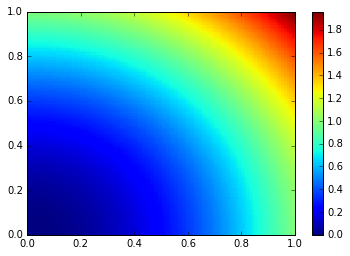

In [6]:
xrange = np.arange(0, 1.01, 0.01)
yrange = np.arange(0, 1.01, 0.01)

X, Y = np.meshgrid(xrange, yrange)
# Different than imshow
plt.pcolor(X, Y, X**2 + Y**2)
plt.colorbar()
plt.show()

## Boolean masking

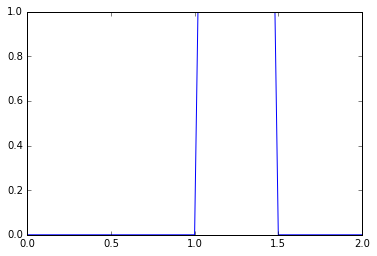

In [26]:
# Boolean arithmetic
x = np.linspace(0, 2, 101)
c = np.zeros(101)

x < 1.5
x > 1.0
np.logical_and(x < 1.5, x > 1.0)

# masking
x[x < 1.5]
x[np.logical_and(x < 1.5, x > 1.0)]
c[np.logical_and(x < 1.5, x > 1.0)] = 1
plt.plot(x, c)

## Plotting

* matlab like functionality with pylab and pyplot

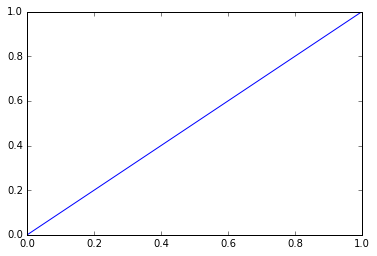

In [8]:
plt.plot([0, 1], [0, 1])

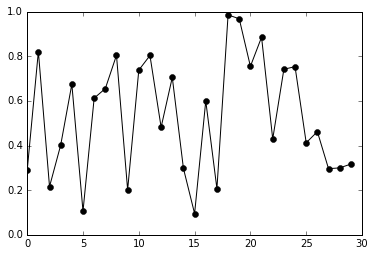

In [9]:
plt.plot(np.random.random(30), 'k-o') # color, linestyle, markerstyle

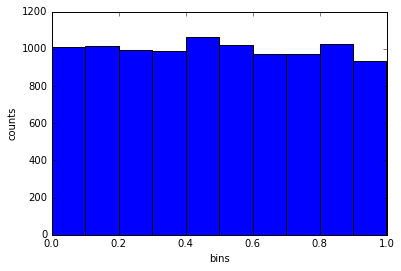

In [10]:
# Bar chart histogram
hist, bins = np.histogram(np.random.random(10000))
plt.bar(bins[:-1], hist, width=np.diff(bins)[0])
plt.xlabel("bins")
plt.ylabel("counts")

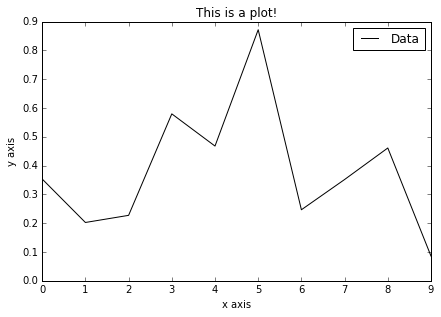

In [11]:
# plt.plot and plt.bar implicitly create figures and axes to plot on
# can do explicitly
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.plot(np.random.random(10), 'k-', label="Data")
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.legend(loc = "best")
ax.set_title("This is a plot!")

(0, 1)

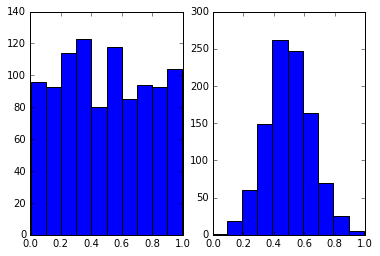

In [12]:
# subplots
fig = plt.figure()
ax = fig.add_subplot(121) # similar to matlab, (rows, columns, ordinal)
ax2 = fig.add_subplot(122)

hist, bins = np.histogram(np.random.uniform(size=1000))
ax.bar(bins[:-1], hist, np.diff(bins))
hist2, bins2 = np.histogram(np.random.normal(0.5, 0.15, size=1000))
ax2.bar(bins2[:-1], hist2, np.diff(bins2))
ax2.set_xlim([0,1])

## Example: 1-D convection

Very basic model of 1-D convection, PDE is:

\begin{equation}
\frac{\partial c}{\partial t} + a \frac{\partial c}{\partial x} = 0
\end{equation}

We can discretize the derivatives using the following:

\begin{equation}
\frac{c_i^{n + 1} - c_i^n}{\Delta t} + a \frac{c_i^{n} - c_{i-1}^n}{\Delta x} = 0
\end{equation}

and solve for $c^{n+1}_i$:
\begin{equation}
c_i^{n+1} = c_i^n - a\frac{\Delta t}{\Delta x} (c_i^n - c_{i-1}^n)
\end{equation}

Let's assume an initial distribution of c = 1 in the interval where 0.5 < x < 1 and c = 0 elsewhere in our domain with x from 0 to 2.

(-0.1, 1.1)

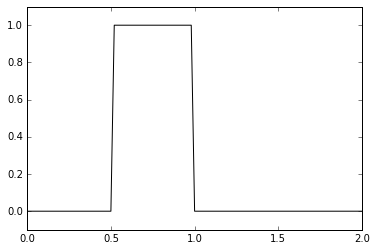

In [13]:
x = np.linspace(0, 2, 101)
dx = np.diff(x)[0]
c = np.zeros(101)
c[np.logical_and(x < 1.0, x > 0.5)] = 1
plt.plot(x, c, 'k-')
plt.ylim(-0.1, 1.1)

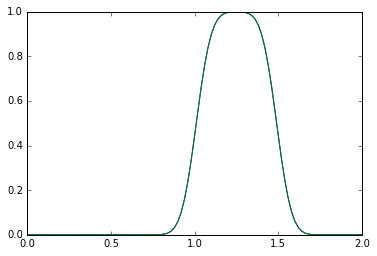

In [21]:
def conc_evolve(timesteps, dt, c_init, x, a):
    c = c_init.copy()
    dx = x[1] - x[0]
    for n in range(timesteps):
        cn = c.copy()
        for i in range(1, len(c)):
            c[i] = cn[i] - a * dt / dx * (cn[i] - cn[i-1])
            
    return c
    
# exercise, get rid of the forloop.
def conc_evolve_vectorized(timesteps, dt, c_init, x, a):
    c = c_init.copy()
    dx = np.diff(x)[0]
    for n in range(timesteps):
        c[1:] = c[1:] - a * dt / dx * (np.diff(c))
    return c

plt.plot(x, conc_evolve(50, 0.01, c, x, 1))
plt.plot(x, conc_evolve_vectorized(50, 0.01, c, x, 1))

## Linear convection in 2-dimensions

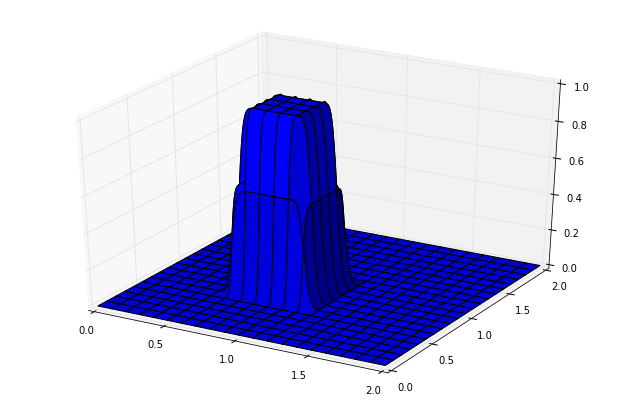

In [45]:
from mpl_toolkits.mplot3d import Axes3D

x = y = np.linspace(0, 2, 201)
X, Y = np.meshgrid(x, y)
C = np.zeros(X.shape)
mask = np.logical_and(np.logical_and(X >= 0.5, X <= 1.0), 
                      np.logical_and(Y >= 0.5, Y <= 1.0))
C[mask] = 1.0

fig = plt.figure(figsize = (11,7))
ax = fig.gca(projection='3d')


def conc_evolve_2d(timesteps, dt, C_init, X, Y, a):
    C = C_init.copy()
    for n in range(timesteps): ##loop across number of time steps
        Cn = C.copy()
        row, col = C.shape
        dx = dy = np.diff(X, axis=1)[0][0]
        for j in range(1, row):
            for i in range(1, col):
                C[j,i] = Cn[j, i] - (a*dt/dx*(Cn[j,i] - Cn[j,i-1]))-(a*dt/dy*(Cn[j,i]-Cn[j-1,i]))
    return C

ax.plot_surface(X, Y, conc_evolve_2d(100, 0.001, C, X, Y, a=1))